In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import _tconfint_generic

___
Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

In [52]:
#the_number_of_symbols_to_limit_the_line_length_according_to_PEP8_is________79

df =  pd.read_csv('data/water.txt', delimiter='\t')
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [47]:
df.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
location     61 non-null object
town         61 non-null object
mortality    61 non-null int64
hardness     61 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


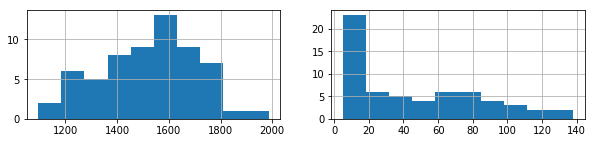

In [66]:
fig, ax = plt.subplots(1,2, figsize=(10,2))
df['mortality'].hist(ax=ax[0])
df['hardness'].hist(ax=ax[1]);

In [10]:
mort_std = df['mortality'].std()
mort_mean = df['mortality'].mean()
print('mort_std', mort_std)
print('mort_mean', mort_mean)

mort_std 187.6687539314571
mort_mean 1524.1475409836066


**Постройте 95% доверительный интервал для средней годовой смертности в больших городах.**

*Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.*

In [42]:
def t_conf_int(sample, alpha):
    mort_std = sample.std()
    mort_mean = sample.mean()
    mort_std_mean = mort_std / np.sqrt(len(sample))
    return _tconfint_generic(mort_mean, mort_std_mean, 
                             len(sample)-1, alpha, 'two-sided')

In [43]:
t_conf_int(df['mortality'], 0.05) 

(1476.0833413552848, 1572.2117406119285)

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам.

In [49]:
t_conf_int(df[df['location'] == 'South']['mortality'], 0.05)

(1320.1517462936238, 1433.463638321761)

На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам.

In [50]:
t_conf_int(df[df['location'] == 'North']['mortality'], 0.05)

(1586.5605251961385, 1680.6394748038613)

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [68]:
t_conf_int(df[df['location']=='South']['hardness'], 0.05)

(53.467198692036106, 86.07126284642544)

In [69]:
t_conf_int(df[df['location']=='North']['hardness'], 0.05)

(21.42248728572426, 39.37751271427574)

Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией: $\sigma^2$:
$$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

при $\sigma = 1$ какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью $\pm 0.1$?

Ответ:
$$z_{1-\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}=0.1$$
$$\sqrt{n} = \frac{z_{1-\frac{\alpha}{2}}\sigma}{0.1}$$
при уровне доверия 0.95: $z_{1-\frac{\alpha}{2}} =2$
$$2\frac{1}{\sqrt{n}}=0.1$$
$$n=1/0.0025 \approx 400$$

In [77]:
(1.95996/0.1)**2

384.14432015999995

In [76]:
20**2

400

In [78]:
import scipy.stats

In [81]:
np.ceil((scipy.stats.norm.ppf(1-0.05/2)/0.1)**2)

385.0